Epoch 1/10
5/5 [==============================] - 0s 0s/step - loss: 5.7750
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 4.4580
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 3.9302
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 3.7759
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 3.7348
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 3.7228
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 3.7165
Epoch 8/10
5/5 [==============================] - 0s 4ms/step - loss: 3.7084
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 3.7042
Epoch 10/10
5/5 [==============================] - 0s 4ms/step - loss: 3.6963
[0.6451612903225806, 0.6559139784946236, 0.6594594594594595, 0.7005988023952096, 0.6900584795321637, 0.6613756613756614, 0.6781609195402298, 0.645, 0.6878612716763006, 0.6444444444444445]
[0.07142857142857142, 0.05714285714285714,

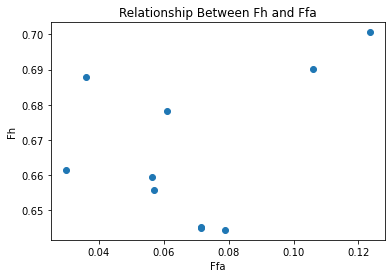

In [68]:
import cv2 
from math import *
import math
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from numpy import loadtxt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import csv
import numpy

def toBlackWhiteBinary(img):
    for i in range(16):
        for j in range(16):
            if img[i][j] != 255:
                img[i][j] = 0
    return img

def makeBinaryImages():                
    for i in range(10):
        path = list(r"C:\Users\billy_000\Documents\UF\Neural Networks\Assign1\Neural-Networks-Assignment-1\Assignment1\images\x.PNG")
        path[104] = str(i)
        path = "".join(path)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = toBlackWhiteBinary(img)
        cv2.imwrite(path, img)
        
def ImageToArray(img):
    final = []
    for i in range(16):
        for j in range(16):
            final.append(img[i][j])
            
    for i in range(len(final)):
        if final[i] == 255:
            final[i] = 1
        else:
            final[i] = 0
    return final

def compareImage(Original, Output):
    mismatch = 0
    for i in range(len(Original)):
        if Output[i] != Original[i]:
            mismatch += 1
    return mismatch / len(Original)

def DataSetOfAllImages():
    dataset = []
    for i in range(10):
        path = list(r"C:\Users\billy_000\Documents\UF\Neural Networks\Assign1\Neural-Networks-Assignment-1\Assignment1\images\x.PNG")
        path[104] = str(i)
        path = "".join(path)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        dataset.append(ImageToArray(img))
    return dataset

def Threshold(Arr):
    newArr = []
    for i in Arr:
        if i > 0.5:
            newArr.append(1)
        else:
            newArr.append(0)
    return newArr

def ThresholdResultArrays(arrs):
    newArr = []
    for i in arrs:
        newArr.append(Threshold(i))
    return newArr

def CountWhitePixels(img):
    count = 0
    for i in img:
        if i == 0:
            count += 1
    return count

def ComputeFh(correctImage, Output):
    TotalBlackPixels = 0
    TotalCorrectPixels = 0
    
    for i in range(len(correctImage)):
        if correctImage[i] == 1:
            TotalBlackPixels += 1
            if(Output[i] == 1):
                TotalCorrectPixels += 1
    return TotalCorrectPixels / TotalBlackPixels

def ComputeFhArray(correctImages, OutputImages):
    fhArr = []
    for i in range(len(correctImages)):
        fhArr.append(ComputeFh(correctImages[i], OutputImages[i]))
    return fhArr

def ComputeFfa(correctImage, Output):
    TotalWrongPixels = 0
    
    for i in range(len(correctImage)):
        if (Output[i] == 1) and (correctImage[i] != 1):
            TotalWrongPixels += 1
    
    return TotalWrongPixels / CountWhitePixels(correctImage)

def ComputeFfaArray(correctImages, OutputImages):
    ffaArr = []
    for i in range(len(correctImages)):
        ffaArr.append(ComputeFfa(correctImages[i], OutputImages[i]))
    return ffaArr
    
def Model():
    
    model = Sequential()
    model.add(Dense(256, input_dim = 256, activation='relu'))
    #model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    model.fit(X, y, epochs=10, batch_size=2, verbose = True)

    
    
    #print(X[1])
    Y = ThresholdResultArrays(model.predict(X))
    FhArray = ComputeFhArray(X, Y)
    FfaArray = ComputeFfaArray(X, Y)
    
    
    print(FhArray)
    print(FfaArray)
    
    plt.scatter(FfaArray, FhArray)
    plt.title("Relationship Between Fh and Ffa")
    plt.xlabel("Ffa")
    plt.ylabel("Fh")
    plt.show()
    
    
def main():
            
    X = numpy.array(DataSetOfAllImages())
    y = X
    
    Model()
    
    stdDevs = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]






